## Task 1 : Understand the Dataset

In [8]:
import pandas as pd

# Step 1: Load the dataset
df = pd.read_csv("C:\\Users\\subal\\Downloads\\Telco_Customer_Churn_Dataset  (3).csv")

In [9]:
# Step 2: Display the first 10 rows
print("First 10 rows of the dataset:")
print(df.head(10))

First 10 rows of the dataset:
   customerID  gender  SeniorCitizen Partner Dependents  tenure PhoneService  \
0  7590-VHVEG  Female              0     Yes         No       1           No   
1  5575-GNVDE    Male              0      No         No      34          Yes   
2  3668-QPYBK    Male              0      No         No       2          Yes   
3  7795-CFOCW    Male              0      No         No      45           No   
4  9237-HQITU  Female              0      No         No       2          Yes   
5  9305-CDSKC  Female              0      No         No       8          Yes   
6  1452-KIOVK    Male              0      No        Yes      22          Yes   
7  6713-OKOMC  Female              0      No         No      10           No   
8  7892-POOKP  Female              0     Yes         No      28          Yes   
9  6388-TABGU    Male              0      No        Yes      62          Yes   

      MultipleLines InternetService OnlineSecurity  ... DeviceProtection  \
0  No phone s

In [10]:
# Step 3: Identify data types of each column
print("\nData types of each column:")
print(df.dtypes)


Data types of each column:
customerID           object
gender               object
SeniorCitizen         int64
Partner              object
Dependents           object
tenure                int64
PhoneService         object
MultipleLines        object
InternetService      object
OnlineSecurity       object
OnlineBackup         object
DeviceProtection     object
TechSupport          object
StreamingTV          object
StreamingMovies      object
Contract             object
PaperlessBilling     object
PaymentMethod        object
MonthlyCharges      float64
TotalCharges         object
Churn                object
dtype: object


In [11]:
# Step 4: Check for missing values
print("\nMissing values in each column:")
print(df.isnull().sum())


Missing values in each column:
customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64


## Tasks 2: Data Cleaning ( Ensure the dataset is clean for analysis.)

In [12]:
# Step 1: Handle missing values
# Dropping rows with missing values
df = df.dropna()

In [13]:
# Step 2: Remove duplicate records
df = df.drop_duplicates()

In [14]:
# Step 3: Standardize column names
df.columns = df.columns.str.lower().str.replace(" ", "_")

In [15]:
# Display dataset info after cleaning
print("Dataset info after cleaning:")
print(df.info())

Dataset info after cleaning:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerid        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   seniorcitizen     7043 non-null   int64  
 3   partner           7043 non-null   object 
 4   dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   phoneservice      7043 non-null   object 
 7   multiplelines     7043 non-null   object 
 8   internetservice   7043 non-null   object 
 9   onlinesecurity    7043 non-null   object 
 10  onlinebackup      7043 non-null   object 
 11  deviceprotection  7043 non-null   object 
 12  techsupport       7043 non-null   object 
 13  streamingtv       7043 non-null   object 
 14  streamingmovies   7043 non-null   object 
 15  contract          7043 non-null   object 
 16  paperlessbill

## Task 3: Exploratory Data Analysis (EDA)

In [16]:
import matplotlib.pyplot as plt
import seaborn as sns

In [17]:
# Standardize column names (safety check)
df.columns = df.columns.str.lower().str.replace(" ", "_")

##### 1. Summary Statistics

In [18]:
print("Summary Statistics:")
print(df.describe())

Summary Statistics:
       seniorcitizen       tenure  monthlycharges
count    7043.000000  7043.000000     7043.000000
mean        0.162147    32.371149       64.761692
std         0.368612    24.559481       30.090047
min         0.000000     0.000000       18.250000
25%         0.000000     9.000000       35.500000
50%         0.000000    29.000000       70.350000
75%         0.000000    55.000000       89.850000
max         1.000000    72.000000      118.750000


##### 2. Mean, Median, Mode

In [19]:
print("\nMean Values:")
print(df.mean(numeric_only=True))

print("\nMedian Values:")
print(df.median(numeric_only=True))

print("\nMode Values:")
print(df.mode().iloc[0])


Mean Values:
seniorcitizen      0.162147
tenure            32.371149
monthlycharges    64.761692
dtype: float64

Median Values:
seniorcitizen      0.00
tenure            29.00
monthlycharges    70.35
dtype: float64

Mode Values:
customerid                0002-ORFBO
gender                          Male
seniorcitizen                    0.0
partner                           No
dependents                        No
tenure                           1.0
phoneservice                     Yes
multiplelines                     No
internetservice          Fiber optic
onlinesecurity                    No
onlinebackup                      No
deviceprotection                  No
techsupport                       No
streamingtv                       No
streamingmovies                   No
contract              Month-to-month
paperlessbilling                 Yes
paymentmethod       Electronic check
monthlycharges                 20.05
totalcharges                        
churn                         

##### 3. Histograms for Numerical Columns

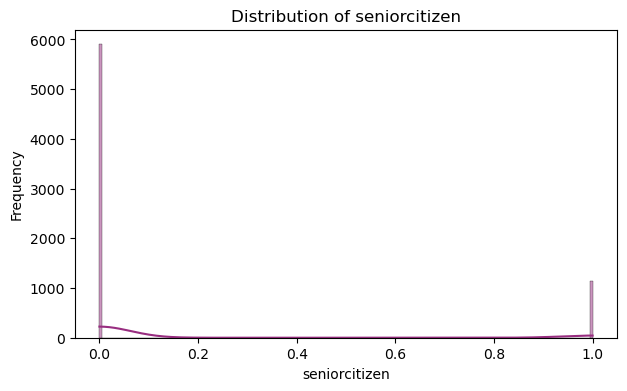

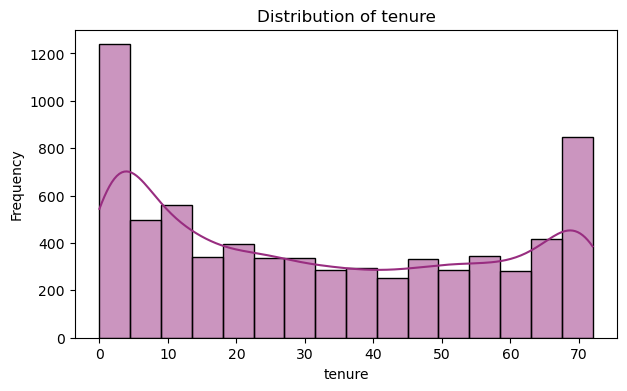

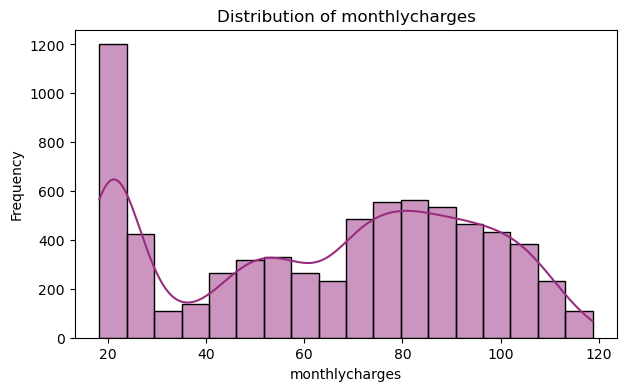

In [24]:
numerical_cols = df.select_dtypes(include=['int64', 'float64']).columns

for col in numerical_cols:
    plt.figure(figsize=(7, 4))
    sns.histplot(
        df[col],
        kde=True,
        color=sns.color_palette("magma")[2]
    )
    plt.title(f"Distribution of {col}", fontsize=12)
    plt.xlabel(col)
    plt.ylabel("Frequency")
    plt.show()

#####  4. Box Plots for Numerical Columns

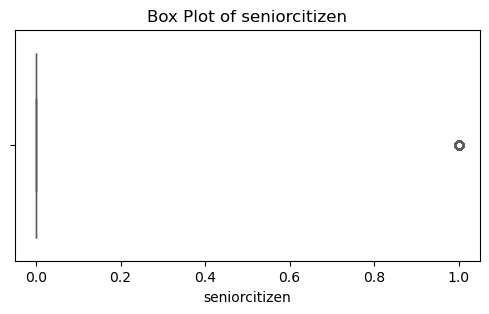

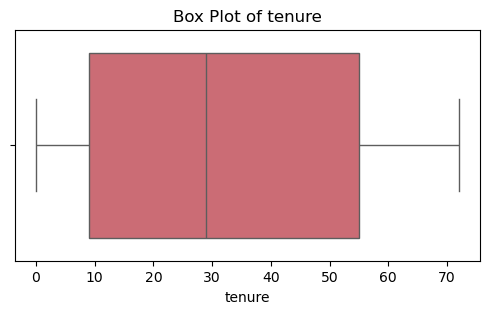

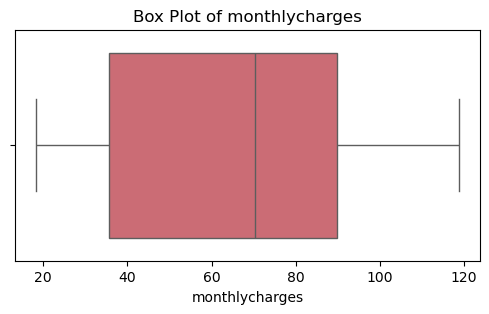

In [25]:
for col in numerical_cols:
    plt.figure(figsize=(6, 3))
    sns.boxplot(
        x=df[col],
        color=sns.color_palette("plasma")[3]
    )
    plt.title(f"Box Plot of {col}", fontsize=12)
    plt.xlabel(col)
    plt.show()

#####  5. Churn Rate Analysis

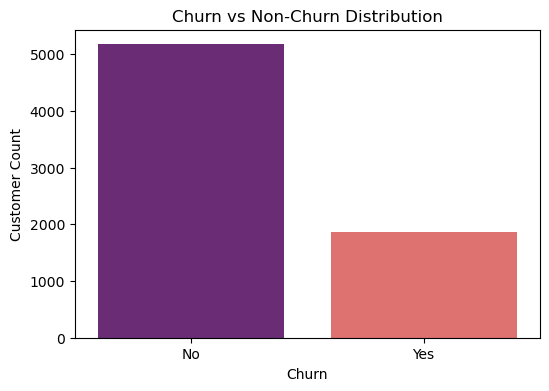


Churn Percentage:
 churn
No     73.463013
Yes    26.536987
Name: proportion, dtype: float64


In [29]:
plt.figure(figsize=(6, 4))
sns.countplot(
    x='churn',
    hue='churn',
    data=df,
    palette='magma',
    legend=False
)
plt.title("Churn vs Non-Churn Distribution")
plt.xlabel("Churn")
plt.ylabel("Customer Count")
plt.show()

# Churn Percentage
churn_percentage = df['churn'].value_counts(normalize=True) * 100
print("\nChurn Percentage:\n", churn_percentage)


## Task 4: Customer Segmentation Visualization

#### 1: Create Tenure Categories

In [30]:
def tenure_group(tenure):
    if tenure <= 12:
        return "0-12 Months"
    elif tenure <= 36:
        return "13-36 Months"
    else:
        return "37+ Months"

df["tenure_group"] = df["tenure"].apply(tenure_group)

#### 2: Pie / Donut Chart – Customer Distribution by Tenure (Plotly)

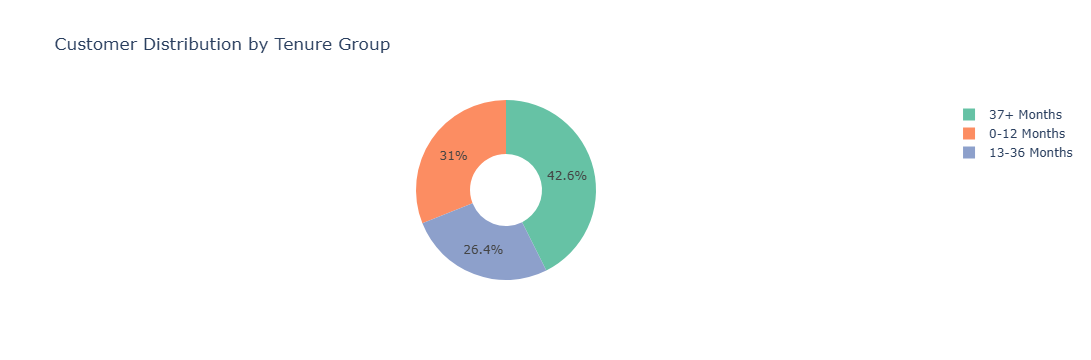

In [31]:
import plotly.express as px

# Count customers per tenure group
tenure_counts = df["tenure_group"].value_counts().reset_index()
tenure_counts.columns = ["Tenure Group", "Customer Count"]

# Donut chart
fig = px.pie(
    tenure_counts,
    names="Tenure Group",
    values="Customer Count",
    hole=0.4,
    color_discrete_sequence=px.colors.qualitative.Set2,
    title="Customer Distribution by Tenure Group"
)

fig.show()


#### 3: Clustered Bar Chart – Avg Monthly Charges by Tenure Group (Matplotlib)

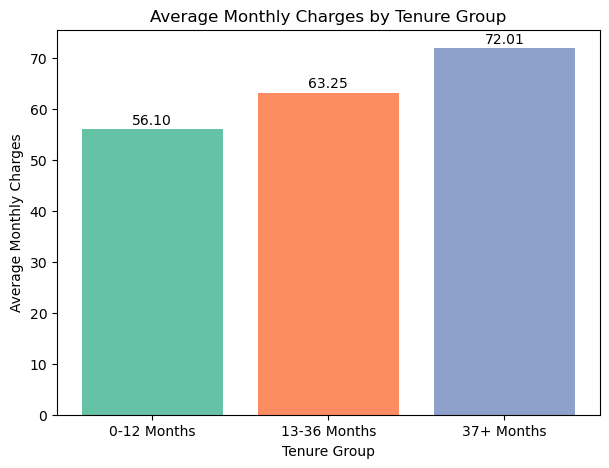

In [32]:
import matplotlib.pyplot as plt

# Average monthly charges per tenure group
avg_charges = df.groupby("tenure_group")["monthlycharges"].mean()

# Clustered bar chart
plt.figure(figsize=(7, 5))
bars = plt.bar(
    avg_charges.index,
    avg_charges.values,
    color=["#66c2a5", "#fc8d62", "#8da0cb"]
)

# Add annotations
for bar in bars:
    height = bar.get_height()
    plt.text(
        bar.get_x() + bar.get_width() / 2,
        height + 1,
        f"{height:.2f}",
        ha="center",
        fontsize=10
    )

plt.title("Average Monthly Charges by Tenure Group")
plt.xlabel("Tenure Group")
plt.ylabel("Average Monthly Charges")
plt.show()


# ___________________________________________________________________________________

## Task 5: Advanced Analysis

#### 1: Charges & Churn Statistics by Tenure Group

In [33]:
# Group by tenure group
tenure_stats = df.groupby("tenure_group").agg(
    avg_monthly_charges=("monthlycharges", "mean"),
    median_monthly_charges=("monthlycharges", "median"),
    churn_rate=("churn", lambda x: (x == "Yes").mean() * 100)
)

print("Tenure-wise Statistics:")
print(tenure_stats)


Tenure-wise Statistics:
              avg_monthly_charges  median_monthly_charges  churn_rate
tenure_group                                                         
0-12 Months             56.097781                  55.900   47.438243
13-36 Months            63.248195                  69.675   25.538793
37+ Months              72.008730                  80.300   11.929357


#### 2: Churn Analysis by Demographics

##### Churn by Gender

In [35]:
gender_churn = df.groupby("gender")["churn"].value_counts(normalize=True).unstack() * 100
print("Churn Rate by Gender:")
print(gender_churn)

Churn Rate by Gender:
churn          No        Yes
gender                      
Female  73.079128  26.920872
Male    73.839662  26.160338


##### Churn by Senior Citizen Status

senior_churn = df.groupby("seniorcitizen")["churn"].value_counts(normalize=True).unstack() * 100
print("Churn Rate by Senior Citizen Status:")
print(senior_churn)

#### 3: Churn Analysis by Payment Method & Contract Type

##### Payment Method

In [37]:
payment_churn = df.groupby("paymentmethod")["churn"].value_counts(normalize=True).unstack() * 100
print("Churn Rate by Payment Method:")
print(payment_churn)

Churn Rate by Payment Method:
churn                             No        Yes
paymentmethod                                  
Bank transfer (automatic)  83.290155  16.709845
Credit card (automatic)    84.756899  15.243101
Electronic check           54.714588  45.285412
Mailed check               80.893300  19.106700


##### Contract Type

In [38]:
contract_churn = df.groupby("contract")["churn"].value_counts(normalize=True).unstack() * 100
print("Churn Rate by Contract Type:")
print(contract_churn)

Churn Rate by Contract Type:
churn                  No        Yes
contract                            
Month-to-month  57.290323  42.709677
One year        88.730482  11.269518
Two year        97.168142   2.831858


#### 4: Lifecycle Stage Visualization (Tenure vs Churn)

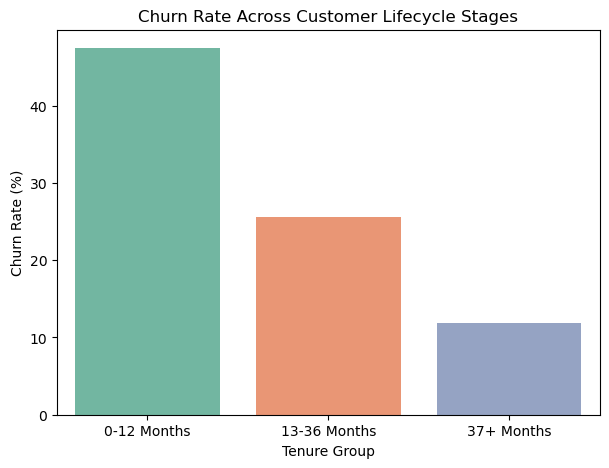

In [40]:
plt.figure(figsize=(7, 5))
sns.barplot(
    x=tenure_stats.index,
    y=tenure_stats["churn_rate"],
    hue=tenure_stats.index,
    palette="Set2",
    legend=False
)
plt.title("Churn Rate Across Customer Lifecycle Stages")
plt.xlabel("Tenure Group")
plt.ylabel("Churn Rate (%)")
plt.show()